In [2]:
# Importing important librararie
import pymongo
import pprint
import json
import warnings
import pandas as pd, numpy as np
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import cross_val_score

In [3]:
# Load the dataframe
df = pd.read_csv("data/sensor_data.csv")
df.head()

,Unnamed: 0,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [28]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df.head()

,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [29]:
df.shape

(4204799, 27)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204799 entries, 0 to 4204798
Data columns (total 27 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   timestamp                                           object 
 1   Auxiliary Boilers A/B Feed Water Header Pressure 2  float64
 2   Auxiliary Boilers Feed Water Header Pressure        float64
 3   Heat Recovery System Header Mass Flow               float64
 4   Heat Recovery System Header Mass Flow.1             float64
 5   Heat Recovery System Header Pressure                float64
 6   Heat Recovery System Header Pressure.1              float64
 7   Lube Oil Cooler Outlet Temperature                  float64
 8   Lube Oil Tank Temperature                           float64
 9   Motor Current Phase A                               float64
 10  Motor Current Phase B                               float64
 11  Motor Current Phase C                

#### Corrections to be made:
1) Convert timestamp to_date_time format.

In [28]:
# making a backup for the original dataframe
df_backup = df.copy()

In [29]:
df.columns

Index(['timestamp', 'Auxiliary Boilers A/B Feed Water Header Pressure 2',
       'Auxiliary Boilers Feed Water Header Pressure',
       'Heat Recovery System Header Mass Flow',
       'Heat Recovery System Header Mass Flow.1',
       'Heat Recovery System Header Pressure',
       'Heat Recovery System Header Pressure.1',
       'Lube Oil Cooler Outlet Temperature', 'Lube Oil Tank Temperature',
       'Motor Current Phase A', 'Motor Current Phase B',
       'Motor Current Phase C', 'Motor Input Power', 'Motor Power Factor',
       'Motor Voltage', 'Pump Discharge Pressure',
       'Pump Discharge Volumetric Flow', 'Pump Journal 1 Bearing Temperature',
       'Pump Journal 2 Bearing Temperature', 'Pump Radial Bearing Vibration',
       'Pump Shaft Speed', 'Pump Suction Pressure 1',
       'Pump Suction Pressure 2',
       'Pump Suction Strainer Differential Pressure',
       'Pump Suction Temperature', 'Pump Thrust Bearing Temperature 1',
       'Pump Thrust Bearing Temperature 2'],
    

These columns can be broadly categorised into - flow, pressure, temperature, current, voltage, power and speed.
Let's plot one of each categories column to see their initial behavior/relation.

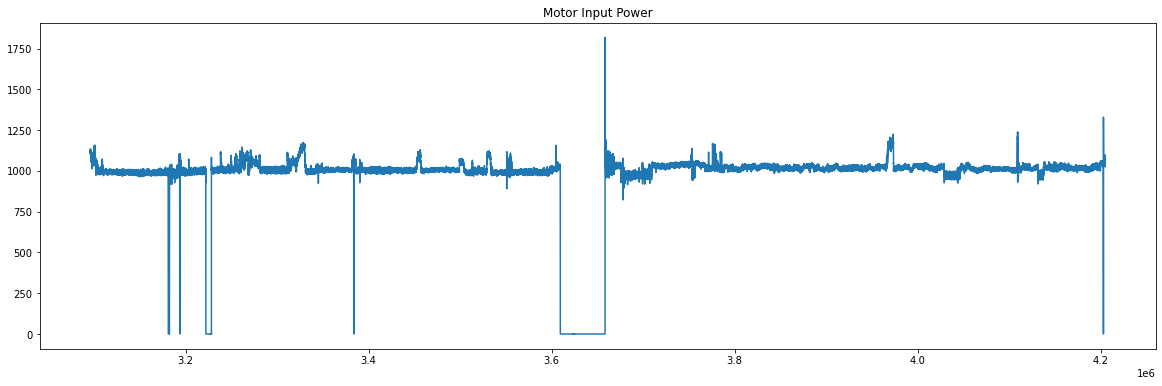

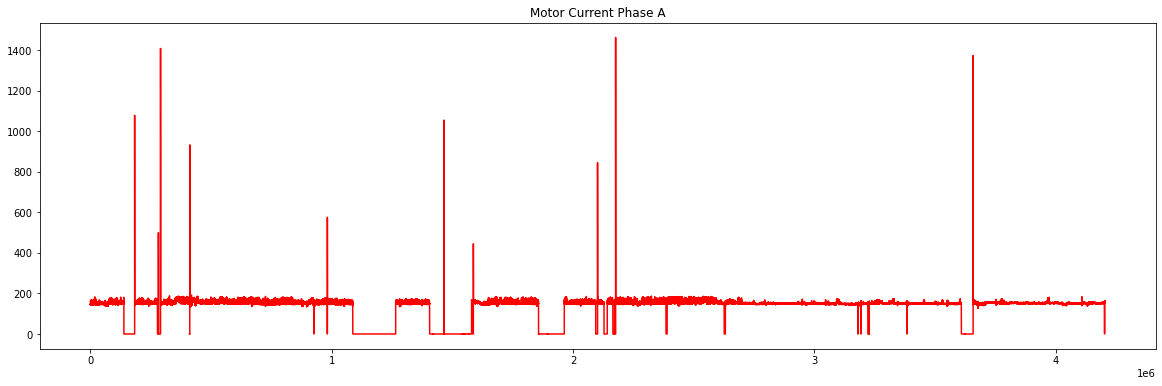

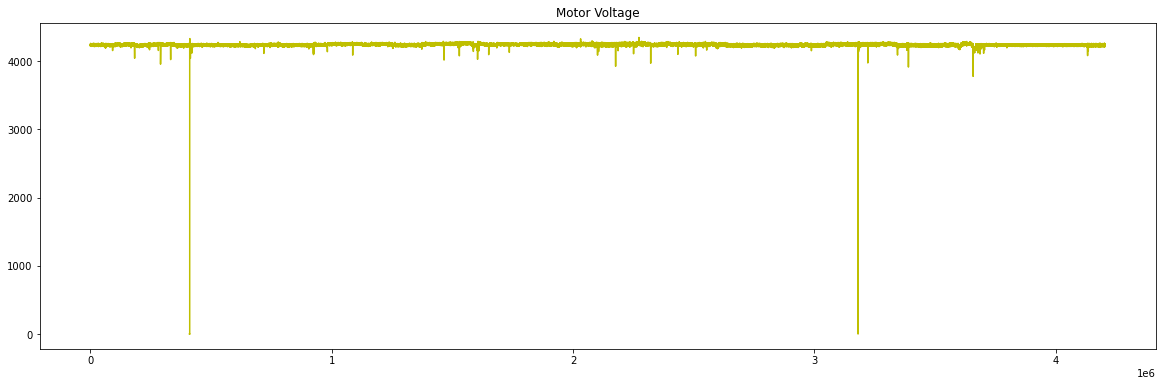

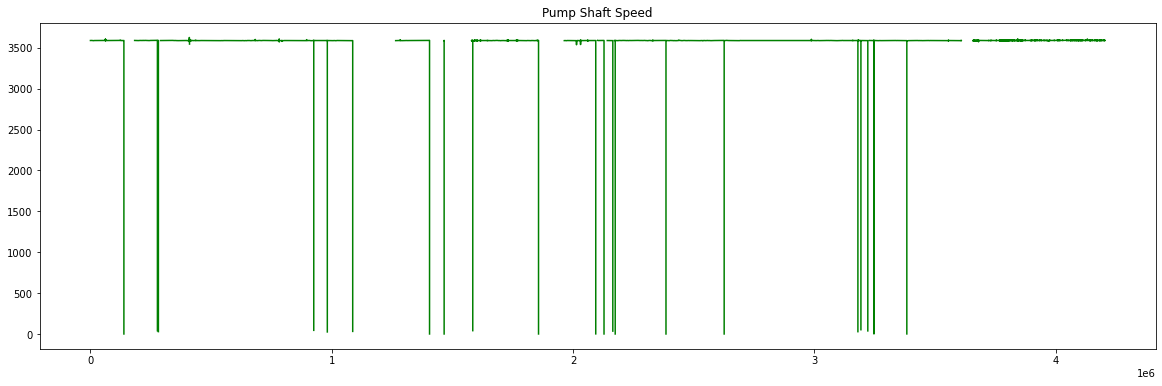

In [38]:
df['Motor Input Power'].plot(figsize=[20,6], title='Motor Input Power')
plt.show()
df['Motor Current Phase A'].plot(figsize=[20,6], color='r',title='Motor Current Phase A' )
plt.show()
df['Motor Voltage'].plot(figsize=[20,6], color='y',title='Motor Voltage')
plt.show()
df['Pump Shaft Speed'].plot(figsize=[20,6], color='g',title='Pump Shaft Speed')
plt.show()

It can be clearly observed that the above column categories come down to 0 many times, which may signify that the machine's operating condition changes from on-off. 

Modelling would require to filter out the 0 values of these columns as there are regular constant 0 values which will lead to bias in modelling.

## Data Filtering

In [4]:
# filering on the basis of pump shaft speed
df = df[df['Pump Shaft Speed']>3000].reset_index(drop=True)
df.head()

,Unnamed: 0,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [40]:
df.describe()

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
count,3.588278e+06,3.588278e+06,3.588280e+06,3.588280e+06,3.588271e+06,3.588266e+06,3.588203e+06,3.588280e+06,3.588149e+06,3.588149e+06,...,3.588213e+06,3.588165e+06,3.588244e+06,3.588282e+06,3.588277e+06,3.588233e+06,3.588278e+06,3.588202e+06,3.588194e+06,3.588243e+06
mean,1.295625e+03,1.295622e+03,3.115100e+05,3.124644e+05,1.731355e+03,1.734750e+03,7.964416e+01,8.284548e+01,1.526969e+02,1.527162e+02,...,1.410914e+02,1.466296e+02,8.895772e+00,3.589133e+03,2.447923e+01,1.677434e+01,3.564586e-01,2.267326e+02,1.034176e+02,9.366966e+01
std,7.183295e+01,7.170263e+01,6.009544e+04,6.679152e+04,8.220709e+01,8.238397e+01,1.455344e+01,1.514749e+01,5.844980e+00,5.828207e+00,...,6.627185e+00,4.849169e+00,1.050220e+00,1.001821e+00,6.202050e-01,5.288627e-01,8.322898e-02,5.519624e+00,1.082917e+01,1.230803e+01
min,-3.509497e+00,-3.456347e+00,0.000000e+00,0.000000e+00,1.885445e+01,1.499203e+01,3.834636e+01,3.893542e+01,0.000000e+00,0.000000e+00,...,4.971143e+01,4.974572e+01,4.559251e+00,3.099318e+03,-9.059578e-03,4.316585e+00,-5.949517e-02,7.298004e+01,6.192418e+01,5.242389e+01
25%,1.293033e+03,1.293462e+03,3.180053e+05,3.208379e+05,1.728799e+03,1.732510e+03,6.951834e+01,7.238956e+01,1.490000e+02,1.490210e+02,...,1.364049e+02,1.431141e+02,8.002185e+00,3.588703e+03,2.429189e+01,1.669548e+01,3.100448e-01,2.268286e+02,9.546984e+01,8.474932e+01
50%,1.300162e+03,1.300167e+03,3.243257e+05,3.287270e+05,1.748611e+03,1.752258e+03,7.977232e+01,8.246943e+01,1.513151e+02,1.513088e+02,...,1.407209e+02,1.460514e+02,8.644639e+00,3.588998e+03,2.455374e+01,1.682934e+01,3.309676e-01,2.271367e+02,1.027432e+02,9.317492e+01
75%,1.307118e+03,1.306707e+03,3.279437e+05,3.324728e+05,1.759008e+03,1.762463e+03,9.088562e+01,9.353547e+01,1.540000e+02,1.540000e+02,...,1.463264e+02,1.503797e+02,9.782559e+00,3.589745e+03,2.473174e+01,1.695525e+01,3.692663e-01,2.274854e+02,1.117928e+02,1.032905e+02
max,1.522039e+03,1.485783e+03,4.355689e+05,4.355188e+05,1.951435e+03,1.946133e+03,1.139856e+02,1.203881e+02,1.920000e+02,1.920000e+02,...,1.584870e+02,1.604716e+02,1.464056e+01,3.626543e+03,3.467742e+01,2.746343e+01,1.111553e+00,2.494325e+02,1.315183e+02,1.240305e+02


In [8]:
# Checking for outliers
df.quantile([0,0.01,0.25,0.5,0.75,0.9,0.95,0.99,1])

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0.00,-7.636613,-6.771245,0.00000,0.000000,17.042439,12.893926,32.432285,38.145237,0.000000,0.000000,...,41.231098,43.575928,0.000000,0.000000,-2.500569,-0.696365,-0.063086,54.354889,38.615856,38.436256
0.01,0.017247,0.014358,0.00000,0.000000,22.049307,18.942179,45.421556,48.752743,0.000000,0.000000,...,50.494530,50.530319,0.869764,3586.954102,3.695837,0.404995,-0.062133,60.796913,49.783033,49.292685
0.25,1292.431641,1292.884399,317366.34380,320153.406300,1724.833496,1728.388550,68.480103,71.886322,148.000000,148.000000,...,132.864380,140.856403,7.699702,3588.703369,24.295977,16.697914,0.296191,226.583298,90.384876,80.720345
0.50,1299.896851,1299.920410,324224.84380,328038.156300,1747.786377,1751.455200,79.121765,81.411118,150.962509,150.968842,...,139.257767,144.970207,8.365638,3588.998291,24.586378,16.850267,0.323973,227.038925,100.523041,90.892532
0.75,1306.909912,1306.519287,327939.31250,332155.906300,1758.330414,1761.804443,89.393486,91.384430,153.000000,153.000000,...,145.210449,149.418045,9.625259,3589.745361,24.808659,17.016968,0.358785,227.415756,110.167503,101.528423
0.90,1314.601563,1313.866699,330888.09380,334746.937500,1767.684204,1770.961426,97.782529,103.434944,159.316519,159.315445,...,149.784467,153.119615,10.372310,3589.998047,25.344891,17.574092,0.440782,227.764877,117.527466,109.543259
0.95,1320.676270,1319.778809,332586.84380,336268.218800,1777.020965,1779.747437,101.889130,107.933849,164.313885,164.347826,...,151.534512,154.602142,10.634660,3590.928467,25.877775,17.798008,0.519426,227.959534,120.664101,112.920036
0.99,1333.603805,1332.684326,335833.18438,339499.677516,1805.929022,1807.089245,108.013202,113.274455,173.333234,173.347934,...,154.377779,157.035444,11.025861,3591.557617,26.294129,18.110916,0.672816,228.347612,125.799154,118.212357
1.00,1522.038940,1485.783203,435568.93750,435518.750000,1951.434692,1946.132935,113.985558,120.388084,1462.750244,1468.593506,...,158.487000,160.471634,25.410971,3626.543457,36.664894,28.158882,1.111553,249.448349,131.518341,124.030472


Some outliers are present, visualize them for the necessary columns.

In [41]:
df.corr()

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
Auxiliary Boilers A/B Feed Water Header Pressure 2,1.000000,0.998630,0.307410,0.258288,0.541053,0.544180,-0.014426,-0.011095,-0.021678,-0.025068,...,-0.003517,0.011403,0.043218,-0.015668,0.234699,0.284942,-0.005261,0.461092,-0.008701,-0.010601
Auxiliary Boilers Feed Water Header Pressure,0.998630,1.000000,0.307919,0.258726,0.542271,0.545402,-0.014397,-0.011012,-0.022407,-0.025810,...,-0.003388,0.011549,0.043410,-0.015880,0.235502,0.285759,-0.005686,0.461939,-0.008651,-0.010555
Heat Recovery System Header Mass Flow,0.307410,0.307919,1.000000,0.638123,0.045723,0.058611,-0.065037,-0.057837,0.096489,0.099403,...,-0.066479,-0.058714,0.042109,-0.080925,0.114641,0.149401,0.041785,0.357230,-0.063636,-0.062229
Heat Recovery System Header Mass Flow.1,0.258288,0.258726,0.638123,1.000000,-0.002669,0.002213,0.017619,0.026181,0.143790,0.145283,...,0.018837,0.017774,-0.012482,-0.105688,0.093277,0.122306,0.079409,0.302661,0.016604,0.020156
Heat Recovery System Header Pressure,0.541053,0.542271,0.045723,-0.002669,1.000000,0.999782,0.064964,0.072537,-0.607968,-0.611464,...,0.051909,0.098357,0.018003,0.146093,0.343012,0.365292,-0.582479,0.300468,0.082376,0.073173
Heat Recovery System Header Pressure.1,0.544180,0.545402,0.058611,0.002213,0.999782,1.000000,0.064120,0.071825,-0.606497,-0.610013,...,0.050926,0.097181,0.017904,0.145934,0.344248,0.366904,-0.581383,0.304373,0.081432,0.072300
Lube Oil Cooler Outlet Temperature,-0.014426,-0.014397,-0.065037,0.017619,0.064964,0.064120,1.000000,0.985980,-0.143219,-0.141072,...,0.940447,0.928494,-0.602959,-0.220508,-0.093522,0.039219,-0.064688,-0.053133,0.993791,0.997673
Lube Oil Tank Temperature,-0.011095,-0.011012,-0.057837,0.026181,0.072537,0.071825,0.985980,1.000000,-0.152789,-0.150758,...,0.939574,0.927902,-0.600989,-0.231922,-0.064889,0.055484,-0.070285,-0.043966,0.984072,0.986339
Motor Current Phase A,-0.021678,-0.022407,0.096489,0.143790,-0.607968,-0.606497,-0.143219,-0.152789,1.000000,0.996264,...,-0.110937,-0.180141,0.002793,-0.244572,-0.396785,-0.423274,0.958470,-0.091617,-0.167013,-0.153013
Motor Current Phase B,-0.025068,-0.025810,0.099403,0.145283,-0.611464,-0.610013,-0.141072,-0.150758,0.996264,1.000000,...,-0.107952,-0.175471,0.004572,-0.253863,-0.399746,-0.425822,0.956318,-0.091815,-0.164153,-0.150599


In [5]:
# Convert Timestamp todatetime format

from datetime import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3588282 entries, 0 to 3588281
Series name: timestamp
Non-Null Count    Dtype         
--------------    -----         
3588282 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 27.4 MB


In [6]:
# Checking for null values
df.isnull().sum()/len(df)*100

Unnamed: 0                                             0.000000
timestamp                                              0.000000
Auxiliary Boilers A/B Feed Water Header Pressure 2     0.000111
Auxiliary Boilers Feed Water Header Pressure           0.000111
Heat Recovery System Header Mass Flow                  0.000056
Heat Recovery System Header Mass Flow.1                0.000056
Heat Recovery System Header Pressure                   0.000307
Heat Recovery System Header Pressure.1                 0.000446
Lube Oil Cooler Outlet Temperature                     0.002202
Lube Oil Tank Temperature                              0.000056
Motor Current Phase A                                  0.003707
Motor Current Phase B                                  0.003707
Motor Current Phase C                                  0.003762
Motor Input Power                                     70.689595
Motor Power Factor                                    70.689818
Motor Voltage                           

In [7]:
# Drop the columns with more than 60% missing values: i.e drop Motor Input Power and Motor Power Factor 

df.drop(['Motor Power Factor','Motor Input Power'], axis=1, inplace=True)
df.head()

,Unnamed: 0,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


As these are time based data, normal imputing methods like mean and median won't work. So forward or backward fill will maintain the distribution of these columns as these are just 15 seconds separated values.

In [8]:
# dealing with the nulls by ffill
df = df.fillna(method='ffill')
df.isnull().sum()

Unnamed: 0                                            0
timestamp                                             0
Auxiliary Boilers A/B Feed Water Header Pressure 2    0
Auxiliary Boilers Feed Water Header Pressure          0
Heat Recovery System Header Mass Flow                 0
Heat Recovery System Header Mass Flow.1               0
Heat Recovery System Header Pressure                  0
Heat Recovery System Header Pressure.1                0
Lube Oil Cooler Outlet Temperature                    0
Lube Oil Tank Temperature                             0
Motor Current Phase A                                 0
Motor Current Phase B                                 0
Motor Current Phase C                                 0
Motor Voltage                                         0
Pump Discharge Pressure                               0
Pump Discharge Volumetric Flow                        0
Pump Journal 1 Bearing Temperature                    0
Pump Journal 2 Bearing Temperature              

In [9]:
df.shape

(3588282, 26)

In [10]:
# Handling outliers
cols = df.loc[:, df.columns!='timestamp']

Q1 = cols.quantile(0.25)
Q3 = cols.quantile(0.75)
IQR = Q3 - Q1

df = df[~((cols < (Q1 - 1.5 * IQR)) |(cols > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
df.shape

(2651166, 26)

In [39]:
df.quantile([0,0.01,0.25,0.5,0.75,0.9,0.95,0.99,1])

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0.00,1271.905884,1273.593994,303098.062500,303387.125000,1683.486084,1687.580688,42.700100,41.696850,142.000000,142.000000,...,121.530197,132.222046,6.103134,3587.140381,23.632126,16.305834,0.223862,225.843384,80.531578,66.233498
0.01,1276.504517,1277.844604,305634.446925,307544.125000,1690.961261,1694.514282,50.567574,52.128353,146.667067,147.000000,...,128.692320,138.126261,7.318151,3587.636963,23.869365,16.427306,0.272217,226.160731,82.897143,69.917719
0.25,1293.462769,1293.885010,319650.031300,322541.468800,1739.759766,1743.436646,70.424517,73.204899,149.000000,149.000000,...,136.640537,143.318787,7.992675,3588.925537,24.369333,16.738804,0.308218,226.869064,96.078461,85.422495
0.50,1300.096558,1300.112183,324778.906300,329535.500000,1750.625000,1754.267700,80.323956,83.066914,151.000000,151.000000,...,140.830551,146.340408,8.607887,3588.998291,24.581841,16.846121,0.325362,227.146606,103.256386,93.724899
0.75,1306.579224,1306.186523,328046.343800,332724.468800,1758.979492,1762.451141,91.788816,95.121908,152.000000,152.000000,...,146.802750,150.865021,9.716658,3589.757324,24.731476,16.957193,0.346662,227.468018,112.609137,104.139481
0.90,1312.818726,1312.063415,330789.968800,335024.250000,1765.724670,1769.125793,99.258251,105.194237,154.625000,154.363762,...,150.392334,153.715988,10.425075,3589.991455,24.872854,17.066174,0.377261,227.769760,118.741875,110.851017
0.95,1316.775848,1315.820435,332468.187500,336419.296875,1769.114868,1772.482544,103.032557,109.139759,156.000000,156.000000,...,151.935696,155.003647,10.657792,3590.893555,24.969570,17.133097,0.400213,227.934326,121.592390,113.862032
0.99,1323.495117,1322.257813,335527.073455,339485.407830,1775.284753,1778.542969,108.530946,113.940836,158.000000,158.000000,...,154.672404,157.220846,11.045541,3590.981934,25.184268,17.263397,0.438404,228.235311,126.167125,118.638727
1.00,1328.244995,1326.574341,342816.625000,349903.937500,1803.920776,1806.792358,113.985558,119.760498,160.030823,160.000000,...,158.171402,160.471634,11.981857,3591.308105,25.391483,17.344881,0.458098,228.470551,131.065872,123.581261


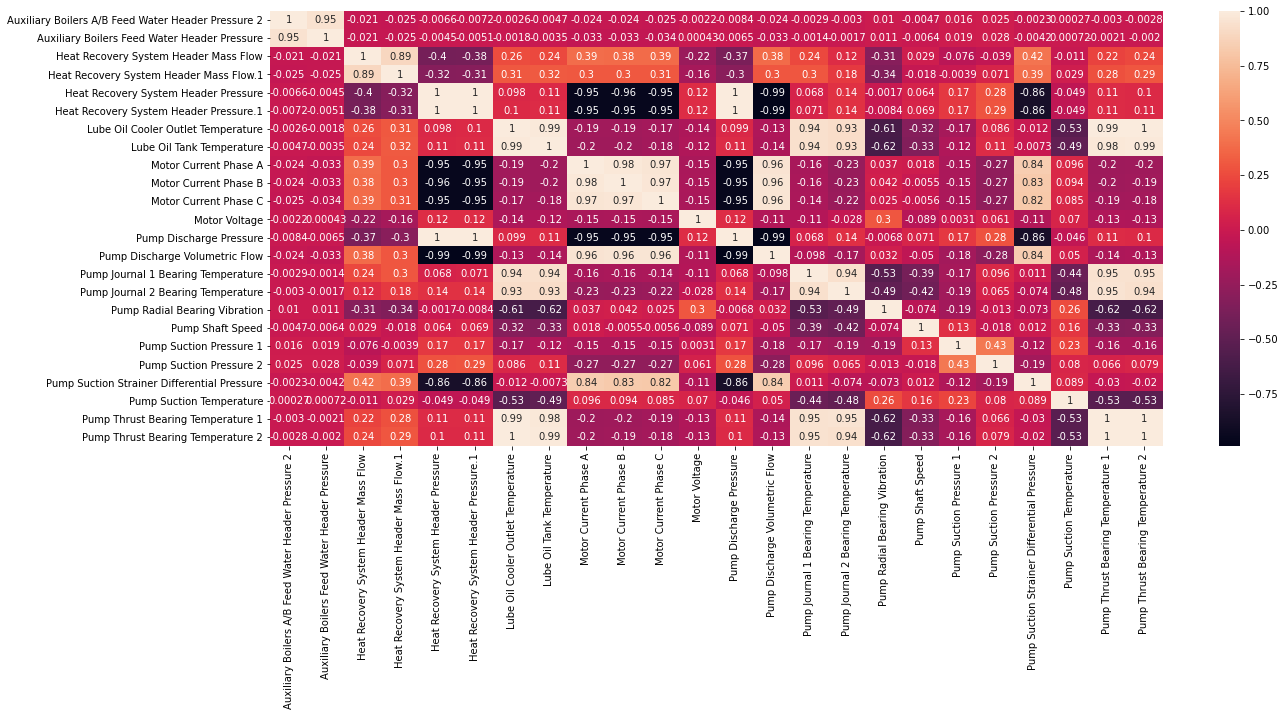

In [40]:
plt.figure(figsize=[20,8])
sns.heatmap(df.corr(), annot=True)
plt.show()

High correlation mostly exists between similar type of columns, i.e columns belonging to the same categories.

<AxesSubplot:>

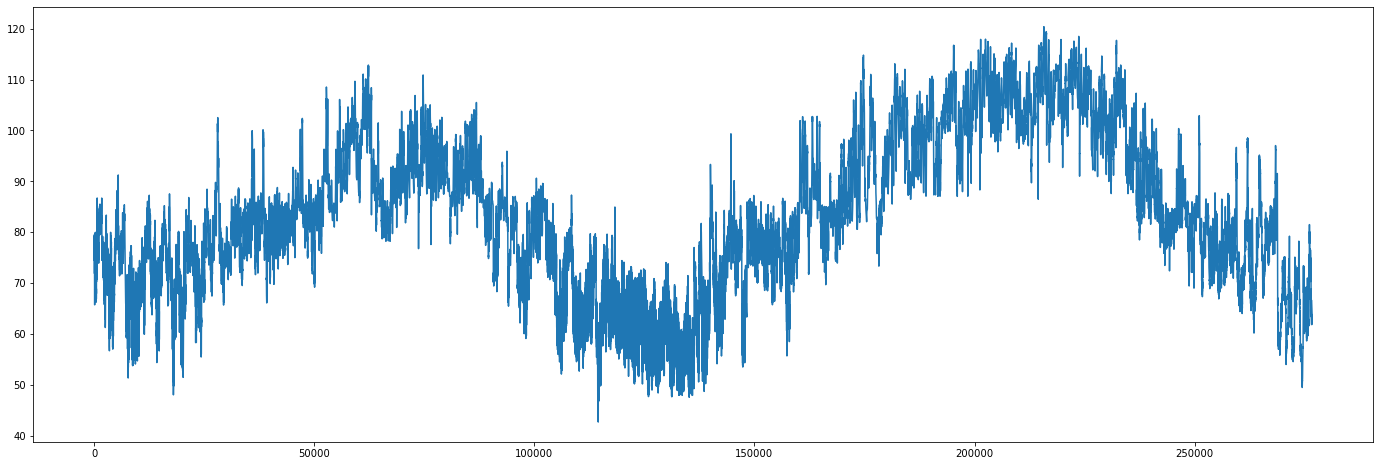

In [17]:
df.loc[::10, 'Lube Oil Tank Temperature'].reset_index(drop=True).plot(figsize=[24,8])

In [42]:
# Dropping the highly correlated columns

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]
print(to_drop)

['Heat Recovery System Header Pressure.1', 'Lube Oil Tank Temperature', 'Motor Current Phase A', 'Motor Current Phase B', 'Motor Current Phase C', 'Pump Discharge Pressure', 'Pump Discharge Volumetric Flow', 'Pump Thrust Bearing Temperature 1', 'Pump Thrust Bearing Temperature 2']


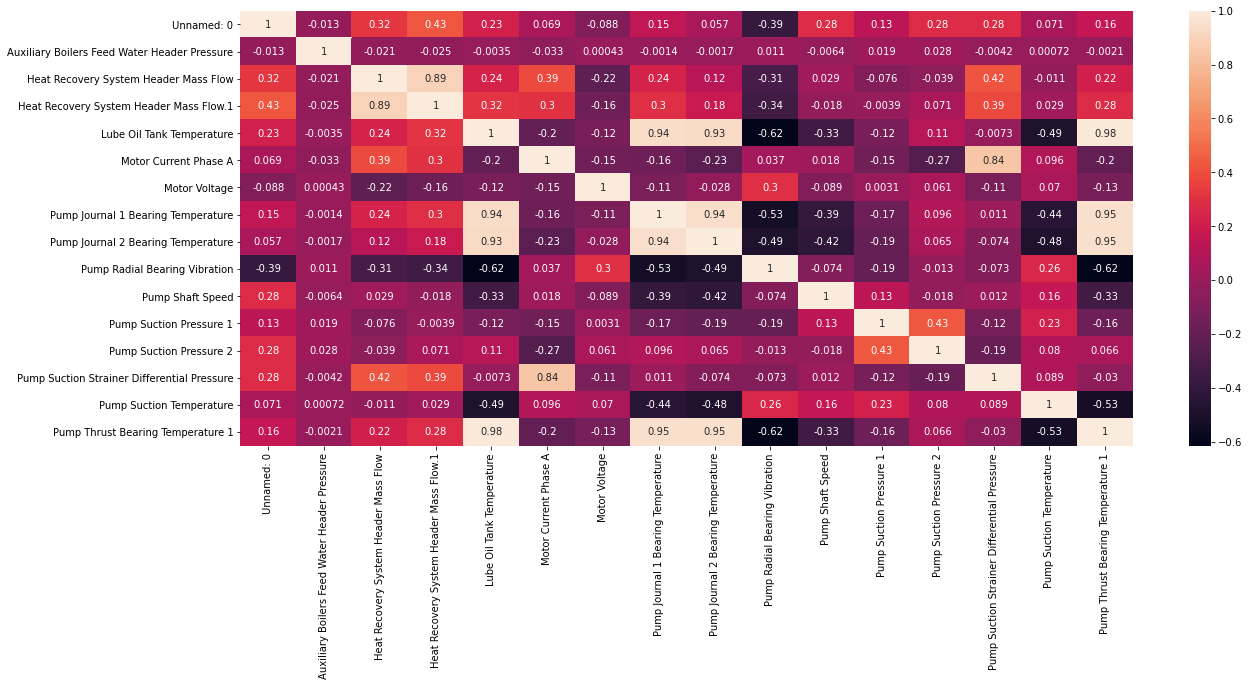

In [12]:
df1 = df.drop(['Auxiliary Boilers A/B Feed Water Header Pressure 2', 'Heat Recovery System Header Pressure.1','Lube Oil Cooler Outlet Temperature',
                'Motor Current Phase C', 'Motor Current Phase B', 'Pump Discharge Pressure','Pump Thrust Bearing Temperature 2', 'Pump Discharge Volumetric Flow',
                'Heat Recovery System Header Pressure'], axis=1)
plt.figure(figsize=[20,8])
sns.heatmap(df1.corr(), annot=True)
plt.show()                
                

In [44]:
df1.columns

Index(['timestamp', 'Auxiliary Boilers Feed Water Header Pressure',
       'Heat Recovery System Header Mass Flow',
       'Heat Recovery System Header Mass Flow.1', 'Lube Oil Tank Temperature',
       'Motor Current Phase A', 'Motor Voltage',
       'Pump Journal 1 Bearing Temperature',
       'Pump Journal 2 Bearing Temperature', 'Pump Radial Bearing Vibration',
       'Pump Shaft Speed', 'Pump Suction Pressure 1',
       'Pump Suction Pressure 2',
       'Pump Suction Strainer Differential Pressure',
       'Pump Suction Temperature', 'Pump Thrust Bearing Temperature 1'],
      dtype='object')

<AxesSubplot:xlabel='Lube Oil Tank Temperature', ylabel='Pump Radial Bearing Vibration'>

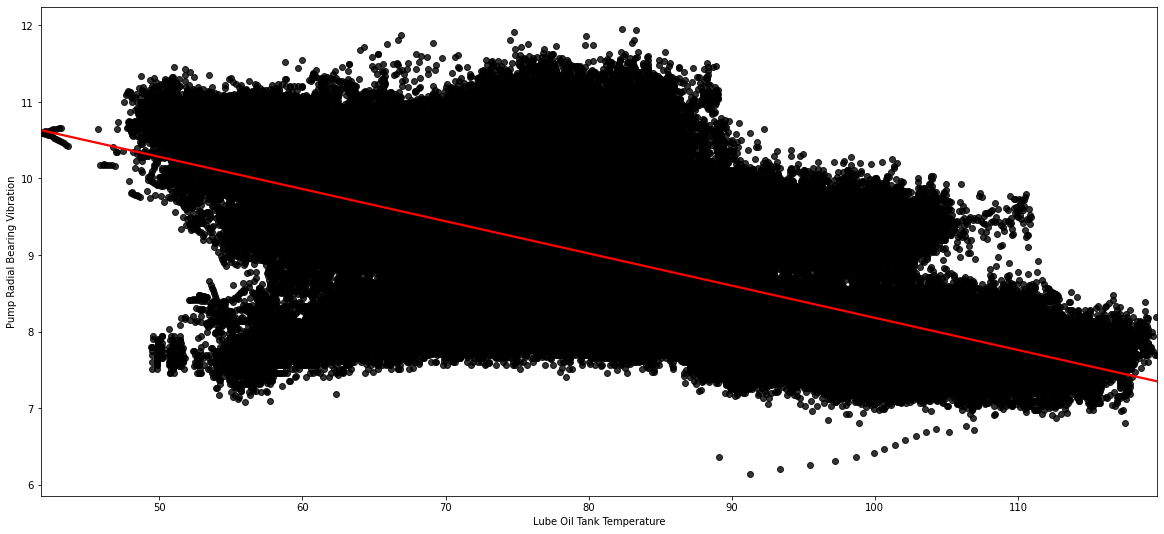

In [48]:
plt.figure(figsize=(20,9))
sns.regplot(x=df1.loc[::10,"Lube Oil Tank Temperature"], 
            y=df1.loc[::10,"Pump Radial Bearing Vibration"], 
            scatter_kws={"color": "black"}, 
            line_kws={"color": "red"})

There is a clear relation between Lube oil Tank Temperature and the target variable. As the tank temperatue increases, the vibrations decreases.

<AxesSubplot:xlabel='Heat Recovery System Header Mass Flow', ylabel='Pump Radial Bearing Vibration'>

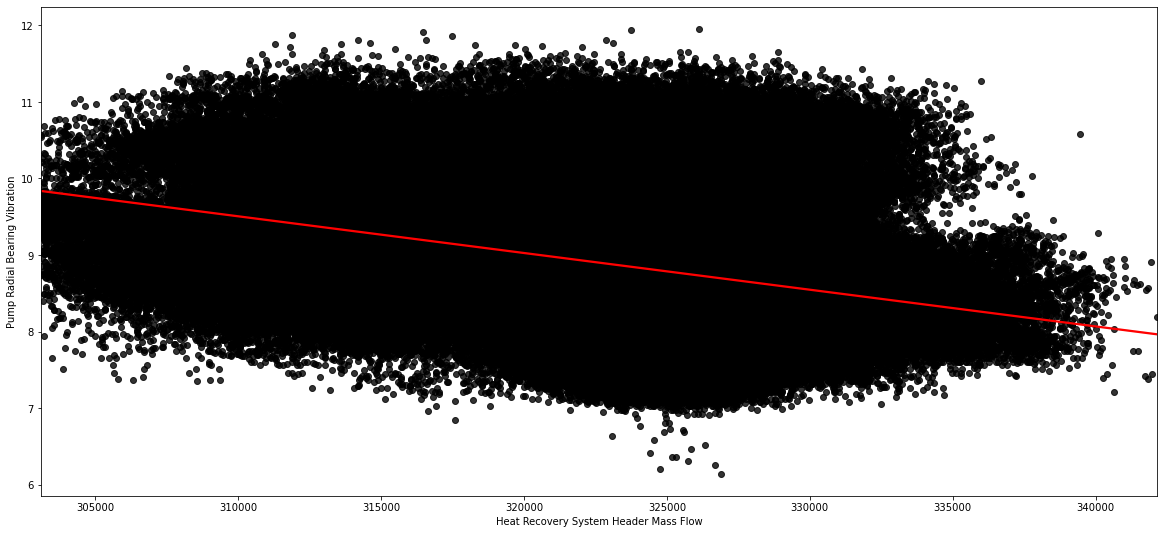

In [49]:
plt.figure(figsize=(20,9))
sns.regplot(x=df1.loc[::10,"Heat Recovery System Header Mass Flow"], 
            y=df1.loc[::10,"Pump Radial Bearing Vibration"], 
            scatter_kws={"color": "black"}, 
            line_kws={"color": "red"})

The realtion between Heat Recovery System Header Mass Flow and the target variable is compartively weaker. 

<AxesSubplot:xlabel='Motor Current Phase A', ylabel='Pump Radial Bearing Vibration'>

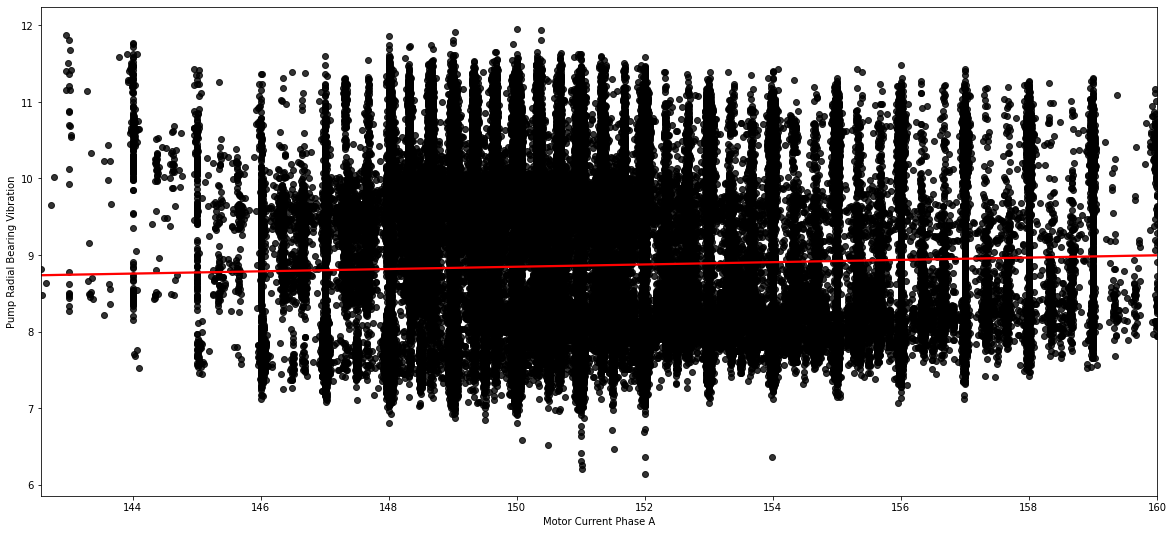

In [50]:
plt.figure(figsize=(20,9))
sns.regplot(x=df1.loc[::10,"Motor Current Phase A"], 
            y=df1.loc[::10,"Pump Radial Bearing Vibration"], 
            scatter_kws={"color": "black"}, 
            line_kws={"color": "red"})

There is no clear correlation between Current and target variable. Current may act as a contributing column and it's feature importance must be checked.

<AxesSubplot:xlabel='Motor Voltage', ylabel='Pump Radial Bearing Vibration'>

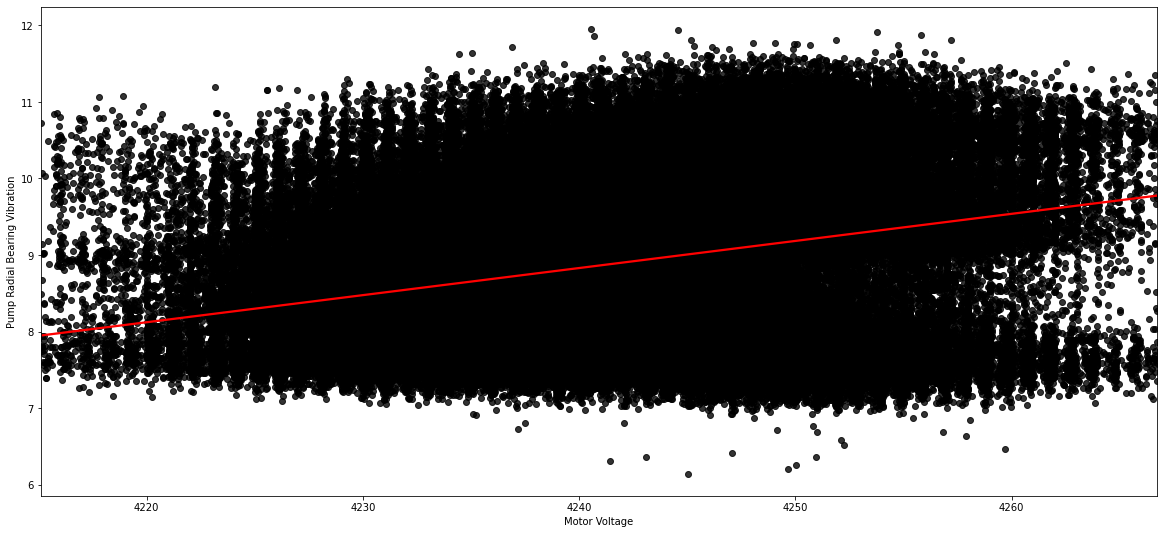

In [51]:
plt.figure(figsize=(20,9))
sns.regplot(x=df1.loc[::10,"Motor Voltage"], 
            y=df1.loc[::10,"Pump Radial Bearing Vibration"], 
            scatter_kws={"color": "black"}, 
            line_kws={"color": "red"})

The target variable increases with the increase in motor voltage.

In [304]:
# Defining X and y variables
X = df1.drop(['timestamp', 'Pump Radial Bearing Vibration'],axis=1)
y = df1['Pump Radial Bearing Vibration']

In [27]:
X.head()

,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Lube Oil Tank Temperature,Motor Current Phase A,Motor Voltage,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1
1,1299.925171,303027.7500,303782.2813,76.948776,145.000000,4235.000000,137.133484,144.299057,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756
2,1294.646606,301878.9688,303518.4375,76.932243,146.306839,4236.454590,137.131317,144.298004,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716
3,1299.988770,302023.0625,303576.3750,76.912827,146.000000,4232.772461,137.129150,144.296936,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683
4,1300.749023,301972.0625,303999.5313,76.892960,146.305389,4240.088379,137.126968,144.295883,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650
5,1299.165527,302555.0625,303541.2500,76.873093,146.000000,4231.694824,137.124802,144.294830,3589.284180,25.003630,16.883806,0.274055,226.740112,98.070610


In [14]:
df1.to_csv('data/cleaned.csv')

In [139]:
# First do train-test- split
from sklearn.model_selection import train_test_split

In [140]:
X.shape, y.shape

((2765965, 14), (2765965,))

In [141]:
# Using only a sample of data for train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.15,test_size=0.45 ,random_state=42)

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

normalized_lr = Pipeline([('scaler', MinMaxScaler()), ('Lr', LinearRegression(n_jobs=-1))])

sbs = sfs(normalized_lr, k_features=8, forward=False, floating=False, scoring='r2', cv=3, verbose=2, n_jobs=-1)

sbs = sbs.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    6.4s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    8.4s finished

[2022-07-22 19:07:33] Features: 13/8 -- score: 0.6313921588701219[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    2.4s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.7s finished

[2022-07-22 19:07:37] Features: 12/8 -- score: 0.6313552412403132[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    1.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.1s finished

[2022-07-22 19:07:41] Features: 11/8 -- score: 0.6311359878781057[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11

In [147]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
sbs = sfs(lr, k_features=8, forward=False, floating=False, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

sbs = sbs.fit(X_train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    4.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    6.8s finished

[2022-07-22 19:08:03] Features: 13/8 -- score: -0.39559911984251983[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    3.5s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    5.6s finished

[2022-07-22 19:08:09] Features: 12/8 -- score: -0.3956387559015822[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    3.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.7s finished

[2022-07-22 19:08:14] Features: 11/8 -- score: -0.3958740306412841[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=False, interaction_only=True)
X_poly_train =  poly.fit_transform(X_train)
len(X_poly_train[0])

# lr=LinearRegression(normalize=True)
# sbs = sfs(lr, k_features=8, forward=False, floating=False, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# sbs = sbs.fit(X_poly_train,y_train)

105

In [149]:
sbs.k_feature_idx_

(2, 5, 7, 8, 9, 10, 12, 13)

In [156]:
sbs.k_feature_names_

('2', '5', '7', '8', '9', '10', '12', '13')

In [157]:
X_train.columns

Index(['Auxiliary Boilers Feed Water Header Pressure',
       'Heat Recovery System Header Mass Flow',
       'Heat Recovery System Header Mass Flow.1', 'Lube Oil Tank Temperature',
       'Motor Current Phase A', 'Motor Voltage',
       'Pump Journal 1 Bearing Temperature',
       'Pump Journal 2 Bearing Temperature', 'Pump Shaft Speed',
       'Pump Suction Pressure 1', 'Pump Suction Pressure 2',
       'Pump Suction Strainer Differential Pressure',
       'Pump Suction Temperature', 'Pump Thrust Bearing Temperature 1'],
      dtype='object')

In [151]:
sbs.k_score_

-0.3998545333376026

In [152]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [158]:
X_train_selected_cols = X_train[['Heat Recovery System Header Mass Flow', 'Motor Current Phase A', 
                                'Pump Journal 1 Bearing Temperature', 'Pump Journal 2 Bearing Temperature', 
                                'Pump Shaft Speed','Pump Suction Pressure 1', 'Pump Suction Strainer Differential Pressure', 
                                'Pump Suction Temperature']]
X_train_selected_cols.head()                                

,Heat Recovery System Header Mass Flow,Motor Current Phase A,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Strainer Differential Pressure,Pump Suction Temperature
1820739,325380.5313,151.000000,133.903351,143.323517,3587.930176,24.379684,0.339893,226.842010
4158396,325606.0313,154.978897,128.646149,139.271790,3590.981934,25.093416,0.372205,227.964264
774574,322600.8125,148.361221,143.629623,149.275391,3587.930176,24.376987,0.291496,227.230804
3820154,333230.7500,154.000000,138.599869,142.890228,3588.436035,24.450314,0.392469,227.590408
2874339,325786.3438,149.000000,139.761154,144.030090,3589.990234,24.780685,0.317626,227.604874


In [159]:
pipe = Pipeline([('poly_features',PolynomialFeatures(2, include_bias=False, interaction_only=True)),
                        ('scaler', MinMaxScaler()), 
                        ('Lr', LinearRegression(n_jobs=-1))])

model = pipe.fit(X_train_selected_cols, y_train)


In [160]:
y_train.values

array([11.34401131,  7.84618902,  8.51059914, ...,  8.63334274,
        7.55779314, 10.8484602 ])

In [162]:
y_pred = model.predict(X_train_selected_cols)

In [163]:
regression_results(y_train.values, y_pred)

explained_variance:  0.5712
mean_squared_log_error:  0.0046
r2:  0.5712
MAE:  0.5382
MSE:  0.4602
RMSE:  0.6783


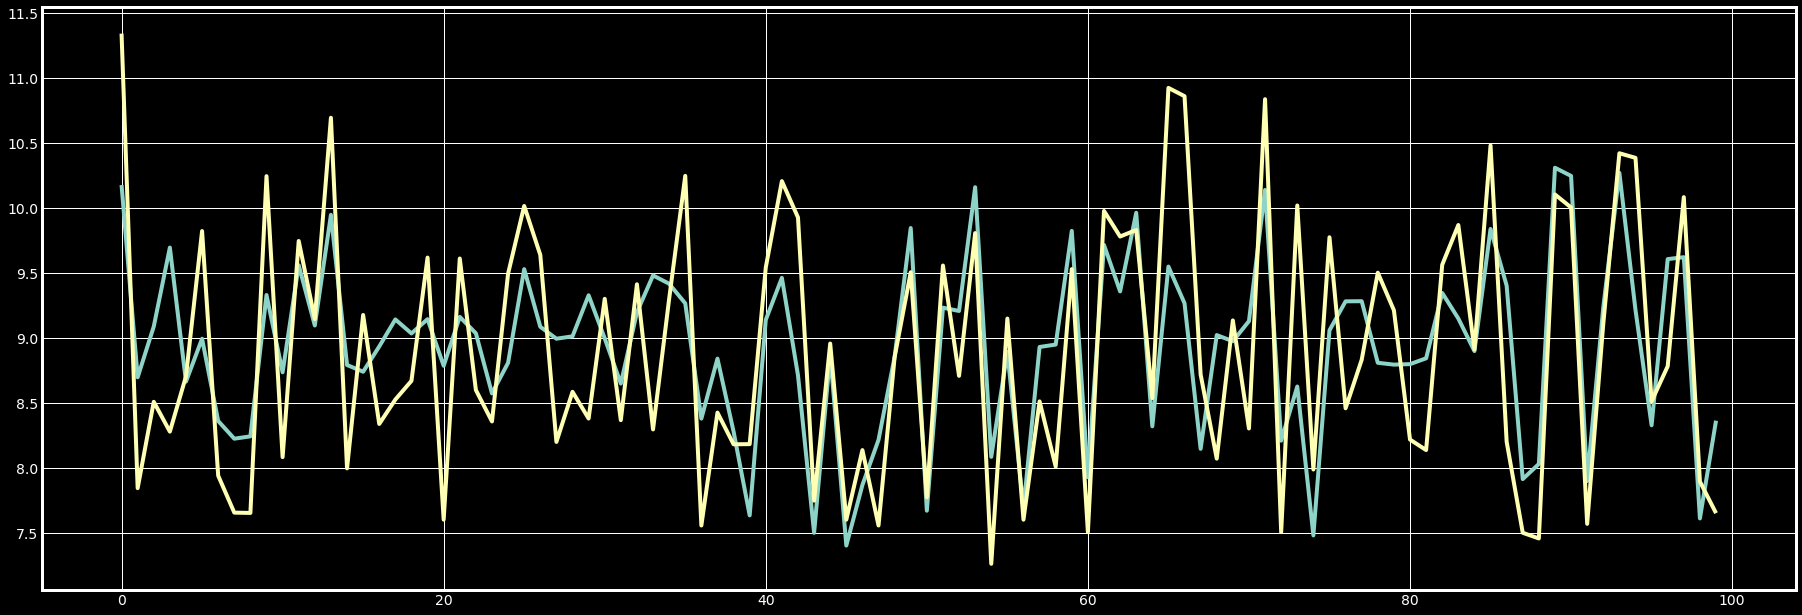

In [164]:
plt.figure(figsize=[28,10])
plt.plot(y_pred[:100])
plt.plot(y_train.values[:100])
plt.show()

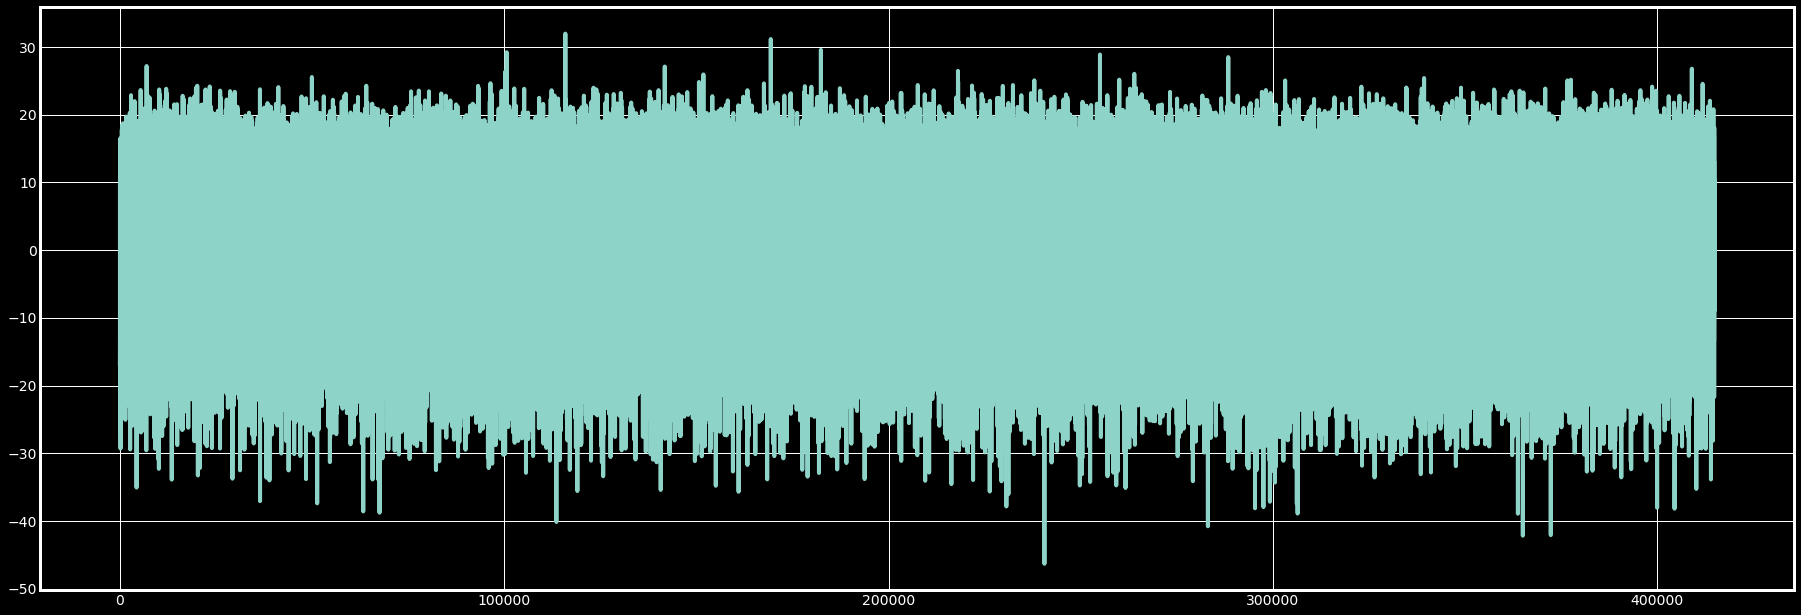

In [165]:
perc_error = (y_train.values - y_pred)/y_train.values * 100
plt.figure(figsize=[28,10])
plt.plot(perc_error)
plt.show()

In [166]:
pd.Series(perc_error).quantile([0,0.01,0.25,0.5,0.75,0.9,0.99, 1])
# ser = pd.Series(perc_error)
# ser.quantile()

0.00   -46.313451
0.01   -18.696960
0.25    -5.636190
0.50    -0.566021
0.75     4.650316
0.90     8.968232
0.99    16.548839
1.00    31.978664
dtype: float64

In [189]:
# testing whether our model is overfitting or not
selected_cols = X_train_selected_cols.columns
y_pred_test = model.predict(X_test[selected_cols])

In [190]:
regression_results(y_test, y_pred_test)

explained_variance:  0.5712
mean_squared_log_error:  0.0046
r2:  0.5712
MAE:  0.5383
MSE:  0.4605
RMSE:  0.6786


### Ridge Regression Modelling

In [53]:
## Importing Ridge regression library
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5)

In [54]:
y_pred_ridge = ridge.predict(X_test)

In [55]:
print("slope: %.2f" % ridge.coef_[0])

slope: 0.00


In [56]:
print("Intercept: %.2f" % ridge.intercept_)

Intercept: 905.46


In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_ridge)


0.3955143382753076

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred_ridge))

0.6288993069445279

In [59]:
print("Rsquared: %.2f" % ridge.score(X_test, y_test))

Rsquared: 0.63


In [62]:
# XGBoost

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

xgbr = XGBRegressor(verbosity = 0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [63]:
xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)
print("Training score: ", score)

Training score:  0.9181579630196199


In [64]:
cv_score = cross_val_score(xgbr, X_train,y_train,cv=4)
print("CV mean Score:", cv_score.mean())

CV mean Score: 0.9104317110483182


In [65]:
y_pred_xgb = xgbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_xgb)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  0.09452948123065055
RMSE:  0.047264740615325276


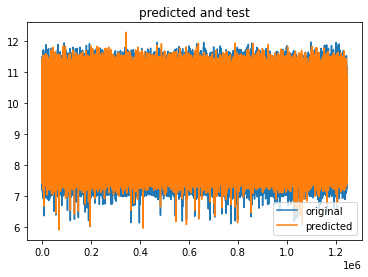

In [70]:
x_ax = range(len(y_test))
plt.plot(x_ax,y_test,label="original")
plt.plot(x_ax, y_pred_xgb, label="predicted")
plt.title("predicted and test")
plt.legend()
plt.show()

In [73]:
import xgboost as xgb

model = xgb.XGBRegressor( 
                    max_depth = 7,
                    min_child_weight = 12,
                    learning_rate = 0.08,
                    n_jobs=-1,
                    subsample = 0.8,
                    # colsample_bytree=study.best_params['xg_colsample_bytree'],
                    objective='reg:squarederror',
                    n_estimators=75
                    )

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mae", eval_set=eval_set, verbose=True)

[0]	validation_0-mae:7.70590
[1]	validation_0-mae:7.08946
[2]	validation_0-mae:6.52235
[3]	validation_0-mae:6.00060
[4]	validation_0-mae:5.52055
[5]	validation_0-mae:5.07891
[6]	validation_0-mae:4.67264
[7]	validation_0-mae:4.29887
[8]	validation_0-mae:3.95494
[9]	validation_0-mae:3.63850
[10]	validation_0-mae:3.34743
[11]	validation_0-mae:3.07964
[12]	validation_0-mae:2.83327
[13]	validation_0-mae:2.60665
[14]	validation_0-mae:2.39806
[15]	validation_0-mae:2.20620
[16]	validation_0-mae:2.02978
[17]	validation_0-mae:1.86742
[18]	validation_0-mae:1.71806
[19]	validation_0-mae:1.58077
[20]	validation_0-mae:1.45469
[21]	validation_0-mae:1.33902
[22]	validation_0-mae:1.23288
[23]	validation_0-mae:1.13574
[24]	validation_0-mae:1.04674
[25]	validation_0-mae:0.96547
[26]	validation_0-mae:0.89129
[27]	validation_0-mae:0.82386
[28]	validation_0-mae:0.76248
[29]	validation_0-mae:0.70676
[30]	validation_0-mae:0.65642
[31]	validation_0-mae:0.61078
[32]	validation_0-mae:0.56989
[33]	validation_0-ma

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=12,
             missing=nan, monotone_constraints='()', n_estimators=75, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

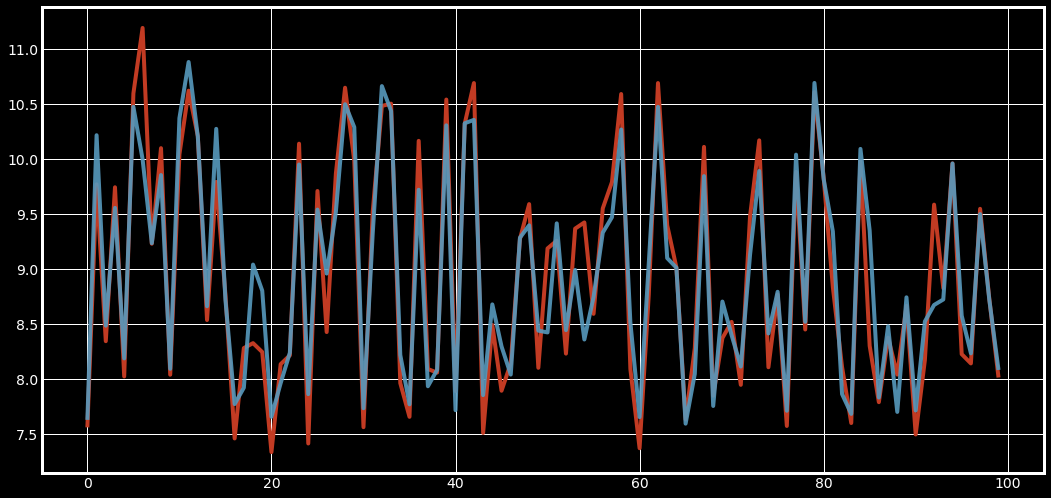

In [75]:
import matplotlib.pyplot as plt

plt.style.use(['fivethirtyeight', 'dark_background'])

# Above not useful, keshav pagal hai usko ache colour chahiye the

plt.figure(figsize=(16,8))
plt.plot(y_test.values[:100], color='#C23B23' )
y_pred_xgb1 = model.predict(X_test)
plt.plot(y_pred_xgb1[:100], color='#579ABE', alpha = 0.9 )
plt.show()

# Feature Selection using xgboost

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

In [97]:
model = xgb.XGBRegressor( 
                    max_depth = 8,
                    min_child_weight = 10,
                    learning_rate = 0.07,
                    n_jobs=-1,
                    subsample = 0.8,
                    # colsample_bytree=study.best_params['xg_colsample_bytree'],
                    objective='reg:squarederror',
                    n_estimators=90,
                    tree_method='hist'
                    )

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mae", eval_set=eval_set, verbose=True)


[0]	validation_0-mae:7.78947
[1]	validation_0-mae:7.24421
[2]	validation_0-mae:6.73716
[3]	validation_0-mae:6.26557
[4]	validation_0-mae:5.82702
[5]	validation_0-mae:5.41917
[6]	validation_0-mae:5.03984
[7]	validation_0-mae:4.68708
[8]	validation_0-mae:4.35902
[9]	validation_0-mae:4.05389
[10]	validation_0-mae:3.77011
[11]	validation_0-mae:3.50621
[12]	validation_0-mae:3.26074
[13]	validation_0-mae:3.03250
[14]	validation_0-mae:2.82021
[15]	validation_0-mae:2.62276
[16]	validation_0-mae:2.43918
[17]	validation_0-mae:2.26842
[18]	validation_0-mae:2.10964
[19]	validation_0-mae:1.96197
[20]	validation_0-mae:1.82468
[21]	validation_0-mae:1.69703
[22]	validation_0-mae:1.57841
[23]	validation_0-mae:1.46818
[24]	validation_0-mae:1.36581
[25]	validation_0-mae:1.27082
[26]	validation_0-mae:1.18271
[27]	validation_0-mae:1.10107
[28]	validation_0-mae:1.02549
[29]	validation_0-mae:0.95553
[30]	validation_0-mae:0.89085
[31]	validation_0-mae:0.83105
[32]	validation_0-mae:0.77592
[33]	validation_0-ma

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.07, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=10,
             missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [101]:
feature_importance = model.get_booster().get_score(importance_type= "gain")
feature_importance

{'Auxiliary Boilers Feed Water Header Pressure': 1.637915015220642,
 'Heat Recovery System Header Mass Flow': 146.9193572998047,
 'Heat Recovery System Header Mass Flow.1': 156.4212646484375,
 'Lube Oil Tank Temperature': 1797.733642578125,
 'Motor Current Phase A': 205.2472686767578,
 'Motor Voltage': 1253.324951171875,
 'Pump Journal 1 Bearing Temperature': 69.0008316040039,
 'Pump Journal 2 Bearing Temperature': 129.1533660888672,
 'Pump Shaft Speed': 380.51416015625,
 'Pump Suction Pressure 1': 839.4951171875,
 'Pump Suction Pressure 2': 283.8664855957031,
 'Pump Suction Strainer Differential Pressure': 221.2144317626953,
 'Pump Suction Temperature': 72.00148010253906,
 'Pump Thrust Bearing Temperature 1': 552.9733276367188}

In [112]:
feature_score = pd.DataFrame({'feature_name':feature_importance.keys() , 
                            'gain':feature_importance.values()}).sort_values("gain", ascending=False).reset_index(drop=True)
feature_score

,feature_name,gain
0,Lube Oil Tank Temperature,1797.733643
1,Motor Voltage,1253.324951
2,Pump Suction Pressure 1,839.495117
3,Pump Thrust Bearing Temperature 1,552.973328
4,Pump Shaft Speed,380.514160
5,Pump Suction Pressure 2,283.866486
6,Pump Suction Strainer Differential Pressure,221.214432
7,Motor Current Phase A,205.247269
8,Heat Recovery System Header Mass Flow.1,156.421265
9,Heat Recovery System Header Mass Flow,146.919357


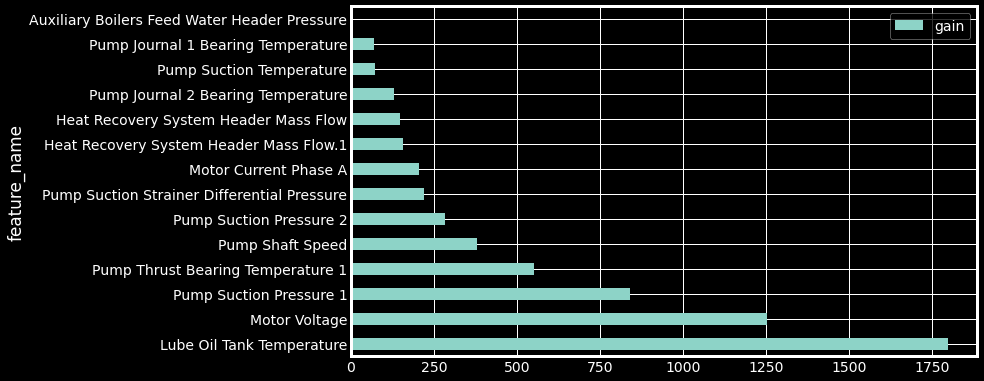

In [120]:
feature_score.plot(x='feature_name', y='gain', kind='barh', figsize=[10,6])
plt.show()

In [127]:
list(feature_score["feature_name"])[:10]

['Lube Oil Tank Temperature',
 'Motor Voltage',
 'Pump Suction Pressure 1',
 'Pump Thrust Bearing Temperature 1',
 'Pump Shaft Speed',
 'Pump Suction Pressure 2',
 'Pump Suction Strainer Differential Pressure',
 'Motor Current Phase A',
 'Heat Recovery System Header Mass Flow.1',
 'Heat Recovery System Header Mass Flow']

In [128]:
selected_cols = feature_score["feature_name"].values[:10]
selected_cols

array(['Lube Oil Tank Temperature', 'Motor Voltage',
       'Pump Suction Pressure 1', 'Pump Thrust Bearing Temperature 1',
       'Pump Shaft Speed', 'Pump Suction Pressure 2',
       'Pump Suction Strainer Differential Pressure',
       'Motor Current Phase A', 'Heat Recovery System Header Mass Flow.1',
       'Heat Recovery System Header Mass Flow'], dtype=object)

# Modelling and tuning on selected columns

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_cols], y, train_size=0.6, random_state=42)

In [184]:
# using hyperparameter tuning
import xgboost
regressor=xgboost.XGBRegressor(tree_method='hist', objective='reg:squarederror', early_stopping_rounds=10)

In [186]:
## Hyper Parameter Optimization


n_estimators = [ 90, 100, 120, 130, 150]
max_depth = [7, 8, 9, 10, 11, 12]
booster = ['gbtree','gblinear']
learning_rate = [0.05,0.07, 0.08,0.1,0.12]
min_child_weight = [5,6,7,8,9]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster
    }

In [187]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [188]:
eval_set = [(X_test, y_test)]
random_cv.fit(X_train,y_train, eval_set=eval_set)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[0]	validation_0-rmse:7.76685
[1]	validation_0-rmse:7.14785
[2]	validation_0-rmse:6.57847
[3]	validation_0-rmse:6.05469
[4]	validation_0-rmse:5.57294
[5]	validation_0-rmse:5.12971
[6]	validation_0-rmse:4.72214
[7]	validation_0-rmse:4.34727
[8]	validation_0-rmse:4.00251
[9]	validation_0-rmse:3.68545
[10]	validation_0-rmse:3.39387
[11]	validation_0-rmse:3.12585
[12]	validation_0-rmse:2.87937
[13]	validation_0-rmse:2.65280
[14]	validation_0-rmse:2.44459
[15]	validation_0-rmse:2.25314
[16]	validation_0-rmse:2.07725
[17]	validation_0-rmse:1.91569
[18]	validation_0-rmse:1.76730
[19]	validation_0-rmse:1.63098
[20]	validation_0-rmse:1.50589
[21]	validation_0-rmse:1.39098
[22]	validation_0-rmse:1.28568
[23]	validation_0-rmse:1.18921
[24]	validation_0-rmse:1.10076
[25]	validation_0-rmse:1.01983
[26]	validation_0-rmse:0.94568
[27]	validation_0-rmse:0.87789
[28]	validation_0-rmse:0.81577
[29]	validation_0-rmse:0.75924
[30]	validation_0-

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=10,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.07, 0.08, 0.1,
                                                          0.12],
                                        'max_depth': [7, 8, 9, 10, 11, 12],
                                        'min_child_weight': [5, 6, 7, 8, 9],
                                        'n_estimators': [90, 100, 120, 130,
                                                         150]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [135]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=8,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [170]:
best_max_depth = random_cv.best_estimator_.max_depth
best_n_est = random_cv.best_estimator_.n_estimators
best_min_weight = random_cv.best_estimator_.min_child_weight
best_lr = random_cv.best_estimator_.learning_rate


In [171]:
regressor=xgboost.XGBRegressor(
             early_stopping_rounds=10,
             learning_rate=best_lr, 
             max_depth=best_max_depth, 
             min_child_weight=best_min_weight,
             n_estimators=best_n_est,
             n_jobs=-1,
             tree_method='hist', 
             objective='reg:squarederror'
             )

In [173]:
eval_set = [(X_test, y_test)]
regressor.fit(X_train,y_train, eval_set=eval_set)

[0]	validation_0-rmse:7.59865
[1]	validation_0-rmse:6.84176
[2]	validation_0-rmse:6.16068
[3]	validation_0-rmse:5.54785
[4]	validation_0-rmse:4.99645
[5]	validation_0-rmse:4.50042
[6]	validation_0-rmse:4.05408
[7]	validation_0-rmse:3.65262
[8]	validation_0-rmse:3.29154
[9]	validation_0-rmse:2.96681
[10]	validation_0-rmse:2.67484
[11]	validation_0-rmse:2.41237
[12]	validation_0-rmse:2.17651
[13]	validation_0-rmse:1.96456
[14]	validation_0-rmse:1.77424
[15]	validation_0-rmse:1.60340
[16]	validation_0-rmse:1.44995
[17]	validation_0-rmse:1.31231
[18]	validation_0-rmse:1.18911
[19]	validation_0-rmse:1.07861
[20]	validation_0-rmse:0.98001
[21]	validation_0-rmse:0.89169
[22]	validation_0-rmse:0.81285
[23]	validation_0-rmse:0.74281
[24]	validation_0-rmse:0.68027
[25]	validation_0-rmse:0.62488
[26]	validation_0-rmse:0.57573
[27]	validation_0-rmse:0.53266
[28]	validation_0-rmse:0.49440
[29]	validation_0-rmse:0.46067
[30]	validation_0-rmse:0.43027
[31]	validation_0-rmse:0.40483
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=10, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=8,
             missing=nan, monotone_constraints='()', n_estimators=150,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [174]:
y_pred = regressor.predict(X_train)

In [175]:
y_pred

array([11.349467 ,  7.674723 ,  8.535613 , ...,  8.64125  ,  7.7311125,
       10.460027 ], dtype=float32)

In [177]:
y_train.values

array([11.34401131,  7.84618902,  8.51059914, ...,  8.63334274,
        7.55779314, 10.8484602 ])

In [178]:
regression_results(y_train.values, y_pred)

explained_variance:  0.9775
mean_squared_log_error:  0.0003
r2:  0.9775
MAE:  0.1158
MSE:  0.0242
RMSE:  0.1555


In [179]:
y_test_pred = regressor.predict(X_test)

In [180]:
regression_results(y_test, y_test_pred)

explained_variance:  0.9599
mean_squared_log_error:  0.0004
r2:  0.9599
MAE:  0.1509
MSE:  0.0431
RMSE:  0.2075


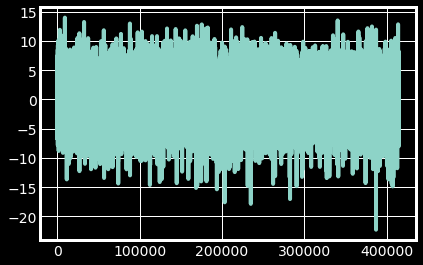

In [181]:
perc_error_train = (y_train.values - y_pred)/y_train.values*100
plt.plot(perc_error_train)
plt.show()

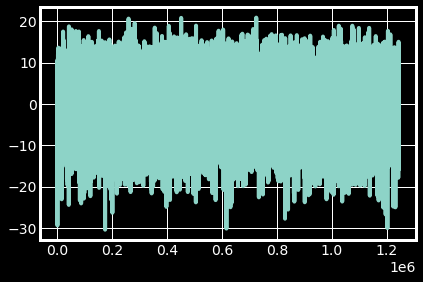

In [182]:
perc_error_test = (y_test.values - y_test_pred)/y_test.values*100
plt.plot(perc_error_test)
plt.show()

In [192]:
!pip install bayesian-optimization

In [210]:
from bayes_opt import BayesianOptimization

In [211]:
def baye_opt(max_depth, min_child_weight, n_estimators, learning_rate, colsample_bytree):
            params_opt = {}
            params_opt['max_depth'] = int(max_depth)
            params_opt['min_child_weight'] = int(min_child_weight)
            params_opt['colsample_bytree'] = colsample_bytree
            params_opt['learning_rate'] = learning_rate
            params_opt['n_estimators'] = int(n_estimators)

            scores = cross_val_score(xgb.XGBRegressor(objective='reg:squarederror', 
                                                        tree_method='hist', 
                                                        **params_opt), 
                                                        X_train, y_train, 
                                                        scoring='neg_mean_absolute_error', 
                                                        cv=5).mean()
            return float(scores.mean())

In [232]:
# params = {'max_depth': (5, 11), 'min_child_weight':(4, 10), 'n_estimators': (70, 130), 'eta':(0.05, 0,12), 'colsample_bytree': (0.3, 0.9)}
params ={'max_depth':(8, 11),
            'min_child_weight': (3, 9),
            'colsample_bytree':(0.6, 1),
            'learning_rate':(0.05, 0.13),
            'n_estimators':(100, 120)
}
xgb_bo = BayesianOptimization(baye_opt, params)
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=7, n_iter=20, acq='ei')

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------
|  1        | -0.2421   |  0.9969   |  0.1007   |  9.306    |  8.332    |  113.9    |
|  2        | -0.2405   |  0.9433   |  0.06341  |  10.55    |  5.715    |  102.3    |
|  3        | -0.2518   |  0.7539   |  0.08625  |  9.844    |  3.505    |  117.1    |
|  4        | -0.2401   |  0.9239   |  0.06446  |  10.1     |  3.547    |  103.6    |
|  5        | -0.2872   |  0.8666   |  0.07603  |  8.445    |  3.576    |  109.7    |
|  6        | -0.273    |  0.7514   |  0.09678  |  8.195    |  6.259    |  118.9    |
|  7        | -0.2519   |  0.6794   |  0.1029   |  9.113    |  6.944    |  117.9    |
|  8        | -0.2757   |  0.6939   |  0.06359  |  9.298    |  8.115    |  109.2    |
|  9        | -0.2406   |  0.9372   |  0.06382  |  10.36    |  4.514    |  102.8    |
|  10       | -0.2234   |  0.7391   |  0.1106   |  10.

In [233]:
xgb_bo.max['params']

{'colsample_bytree': 0.6,
 'learning_rate': 0.13,
 'max_depth': 11.0,
 'min_child_weight': 8.069091199950876,
 'n_estimators': 117.600513964122}

In [234]:
regressor=xgboost.XGBRegressor(
             early_stopping_rounds=10,
             learning_rate=xgb_bo.max['params']['learning_rate'], 
             max_depth=int(xgb_bo.max['params']['max_depth']), 
             min_child_weight=int(xgb_bo.max['params']['min_child_weight']),
             n_estimators=int(xgb_bo.max['params']['n_estimators']),
             colsample_bytree=xgb_bo.max['params']['colsample_bytree'],
             n_jobs=-1,
             tree_method='hist', 
             objective='reg:squarederror'
             )

In [235]:
eval_set = [(X_test, y_test)]
regressor.fit(X_train,y_train, eval_set=eval_set)

[0]	validation_0-rmse:7.34929
[1]	validation_0-rmse:6.40164
[2]	validation_0-rmse:5.57718
[3]	validation_0-rmse:4.86059
[4]	validation_0-rmse:4.23984
[5]	validation_0-rmse:3.70007
[6]	validation_0-rmse:3.22968
[7]	validation_0-rmse:2.82073
[8]	validation_0-rmse:2.46874
[9]	validation_0-rmse:2.16240
[10]	validation_0-rmse:1.89912
[11]	validation_0-rmse:1.66825
[12]	validation_0-rmse:1.46904
[13]	validation_0-rmse:1.29796
[14]	validation_0-rmse:1.15163
[15]	validation_0-rmse:1.02496
[16]	validation_0-rmse:0.91778
[17]	validation_0-rmse:0.82660
[18]	validation_0-rmse:0.75052
[19]	validation_0-rmse:0.68402
[20]	validation_0-rmse:0.62836
[21]	validation_0-rmse:0.58397
[22]	validation_0-rmse:0.54847
[23]	validation_0-rmse:0.51688
[24]	validation_0-rmse:0.49336
[25]	validation_0-rmse:0.47424
[26]	validation_0-rmse:0.45656
[27]	validation_0-rmse:0.44220
[28]	validation_0-rmse:0.43001
[29]	validation_0-rmse:0.42162
[30]	validation_0-rmse:0.41511
[31]	validation_0-rmse:0.40708
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=10, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.13, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=11, max_leaves=0, min_child_weight=8,
             missing=nan, monotone_constraints='()', n_estimators=117,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [236]:
y_pred = regressor.predict(X_train)
regression_results(y_train.values, y_pred)

explained_variance:  0.9303
mean_squared_log_error:  0.0008
r2:  0.9303
MAE:  0.1943
MSE:  0.0748
RMSE:  0.2735


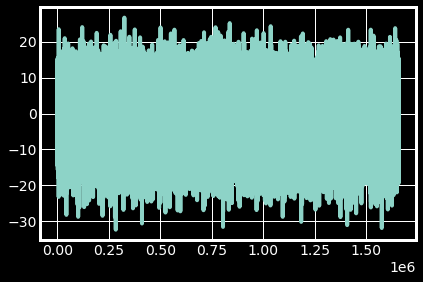

In [237]:
perc_error_train = (y_train.values - y_pred)/y_train.values*100
plt.plot(perc_error_train)
plt.show()

Even after trying out multiple modelling methods: 
- I was not able to observe a low percentage error,
- I couldn't achieve a desirable score on our models,
- test and train performance have a variation of about 30%.

So I plotted the target variable to observe any anomilties in it's behavior.

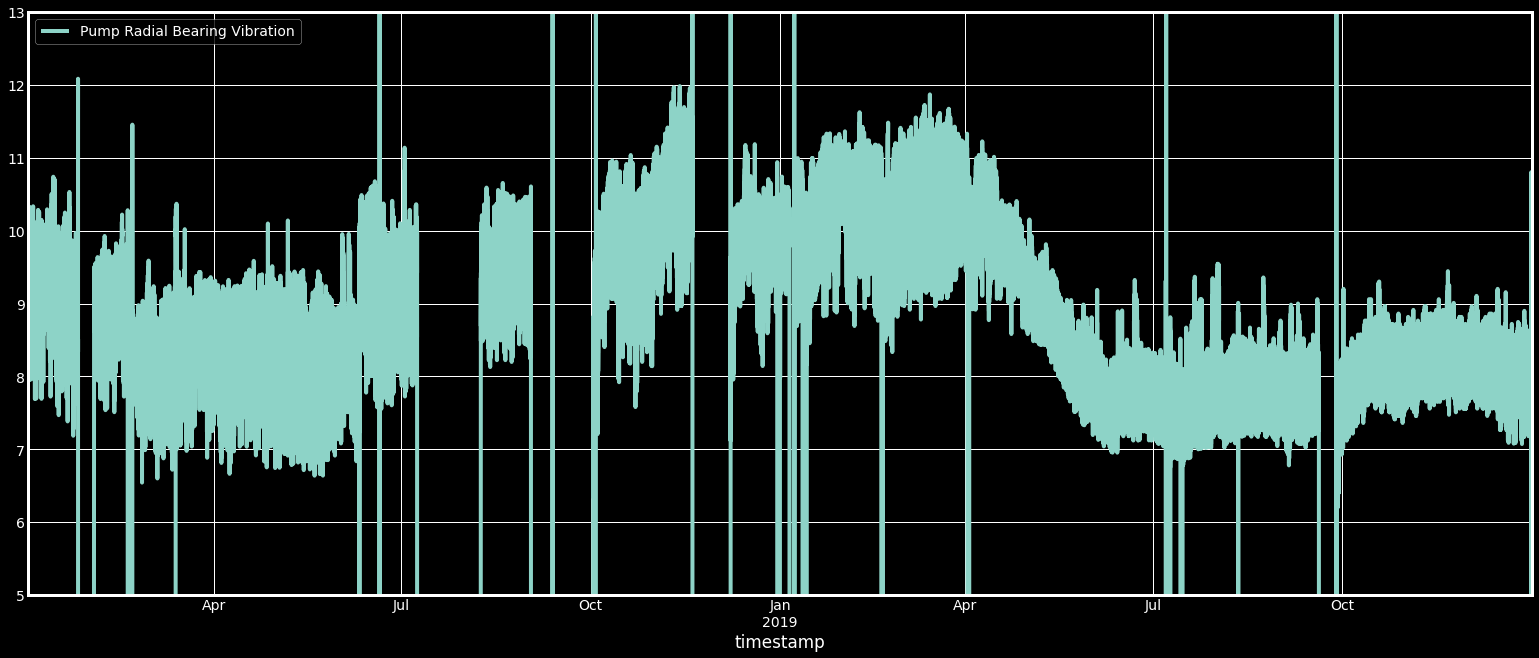

In [247]:
# Visualizing Target variable
df.plot(x='timestamp', y='Pump Radial Bearing Vibration', figsize=[24,10],ylim=(5,13))
plt.show()

- From the above graph, it can be clearly observed that the operating range of Pump Radial Bearing Vibration has abruptly change from june/may, 2019 onwards. 
- The vibration range from june,2019 onwards is 7-9 units.
- So, something has occured with the equipment from june,2019 onwards that has caused this downshift in the vibration's range. 

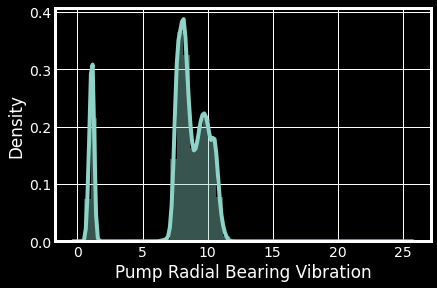

In [248]:
sns.distplot(df['Pump Radial Bearing Vibration'])
plt.show()

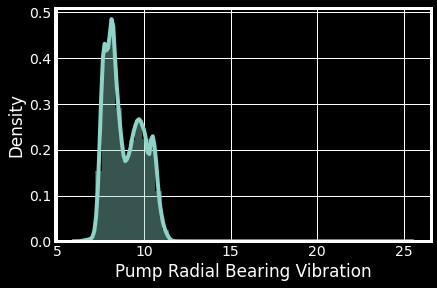

In [251]:
sns.distplot(df[df['Pump Radial Bearing Vibration']>6]['Pump Radial Bearing Vibration'])
plt.show()

The 2 peaks in the distribution plot might signify 2 different operating condtions of the pump radial bearing vibrations.
Therfore, we may need to separate the datasets into 2 periods.

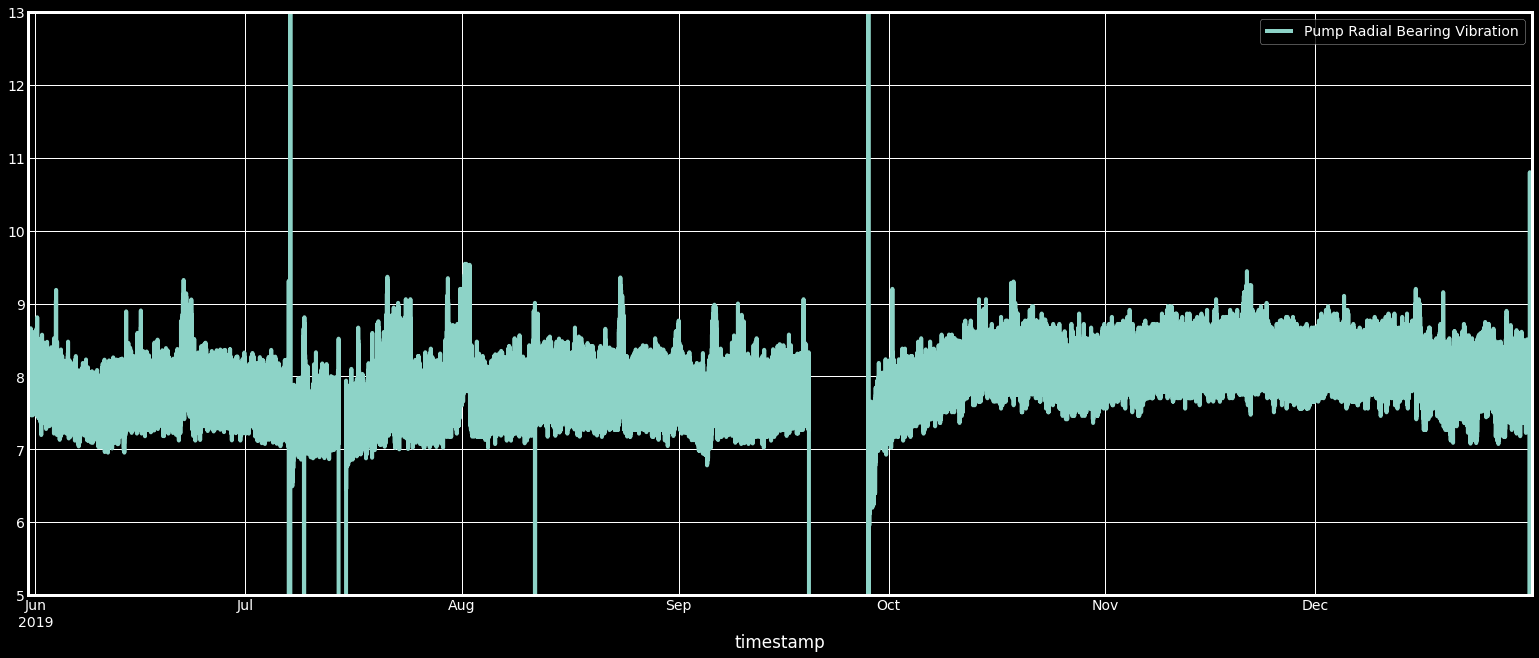

In [254]:
# Visualizing Target variable
df[df.timestamp>datetime.strptime('2019-05-31', '%Y-%m-%d')].plot(x='timestamp', y='Pump Radial Bearing Vibration', figsize=[24,10],ylim=(5,13))
plt.show()

In [253]:
datetime.strptime('2019-05-31', '%Y-%m-%d')

datetime.datetime(2019, 5, 31, 0, 0)

In [256]:
clean_df = df1[df1.timestamp>datetime.strptime('2019-05-31', '%Y-%m-%d')].reset_index(drop=True)
clean_df.head()

,timestamp,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Lube Oil Tank Temperature,Motor Current Phase A,Motor Voltage,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1
0,2019-05-31 00:00:15,1295.454712,314638.1250,322998.1875,82.321625,148.000000,4241.000000,139.755539,144.063110,8.086831,3589.865967,24.959702,17.135006,0.310826,227.618515,100.009262
1,2019-05-31 00:00:30,1295.618774,314598.0313,322907.2500,82.311035,148.000000,4248.867676,139.756103,144.063156,8.104048,3589.866455,24.961050,17.151937,0.311688,227.618652,100.008575
2,2019-05-31 00:00:45,1293.215454,314557.9375,322816.3125,82.300446,148.000000,4251.000000,139.756683,144.063202,8.121264,3589.866943,24.962399,17.168869,0.312550,227.618774,100.007889
3,2019-05-31 00:01:00,1286.872559,315136.4688,322434.7813,82.289856,148.000000,4250.596680,139.757263,144.063263,8.138480,3589.867432,24.963747,17.185801,0.313413,227.618912,100.007202
4,2019-05-31 00:01:15,1280.529541,314591.9375,321050.1250,82.279266,148.903473,4225.000000,139.757843,144.063309,8.155697,3589.867920,24.965094,17.202732,0.314275,227.619049,100.006516


In [258]:
X = clean_df.drop(['timestamp','Pump Radial Bearing Vibration'], axis=1)
y = clean_df['Pump Radial Bearing Vibration']

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.15,test_size=0.4,random_state=42)

In [260]:
normalized_lr = Pipeline([('scaler', MinMaxScaler()), ('Lr', LinearRegression(n_jobs=-1))])

sbs = sfs(normalized_lr, k_features=8, forward=False, floating=False, scoring='r2', cv=3, verbose=2, n_jobs=-1)
sbs = sbs.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    4.1s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    4.7s finished

[2022-07-23 18:52:39] Features: 13/8 -- score: 0.45115328520249126[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    1.1s finished

[2022-07-23 18:52:40] Features: 12/8 -- score: 0.4511260470063762[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.9s finished

[2022-07-23 18:52:42] Features: 11/8 -- score: 0.4509312466923531[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  1

In [261]:
sbs.k_feature_names_

('Heat Recovery System Header Mass Flow.1',
 'Lube Oil Tank Temperature',
 'Motor Voltage',
 'Pump Journal 2 Bearing Temperature',
 'Pump Shaft Speed',
 'Pump Suction Pressure 1',
 'Pump Suction Strainer Differential Pressure',
 'Pump Thrust Bearing Temperature 1')

In [262]:
sbs.k_feature_names_

('Heat Recovery System Header Mass Flow.1',
 'Lube Oil Tank Temperature',
 'Motor Voltage',
 'Pump Journal 2 Bearing Temperature',
 'Pump Shaft Speed',
 'Pump Suction Pressure 1',
 'Pump Suction Strainer Differential Pressure',
 'Pump Thrust Bearing Temperature 1')

In [263]:
pipe = Pipeline([('poly_features',PolynomialFeatures(2, include_bias=False, interaction_only=True)),
                        ('scaler', MinMaxScaler()), 
                        ('Lr', LinearRegression(n_jobs=-1))])

model = pipe.fit(X_train[list(sbs.k_feature_names_)], y_train)

In [265]:
regression_results(y_train.values, model.predict(X_train[list(sbs.k_feature_names_)]))

explained_variance:  0.5196
mean_squared_log_error:  0.0006
r2:  0.5196
MAE:  0.1646
MSE:  0.0432
RMSE:  0.2077


In [266]:
#XGB
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)
model = xgb.XGBRegressor( 
                    max_depth = 8,
                    min_child_weight = 10,
                    learning_rate = 0.07,
                    n_jobs=-1,
                    subsample = 0.8,
                    # colsample_bytree=study.best_params['xg_colsample_bytree'],
                    objective='reg:squarederror',
                    n_estimators=90,
                    tree_method='hist'
                    )

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mae", eval_set=eval_set, verbose=True)

[0]	validation_0-mae:6.83882
[1]	validation_0-mae:6.36013
[2]	validation_0-mae:5.91495
[3]	validation_0-mae:5.50093
[4]	validation_0-mae:5.11590
[5]	validation_0-mae:4.75782
[6]	validation_0-mae:4.42479
[7]	validation_0-mae:4.11508
[8]	validation_0-mae:3.82707
[9]	validation_0-mae:3.55921
[10]	validation_0-mae:3.31010
[11]	validation_0-mae:3.07841
[12]	validation_0-mae:2.86294
[13]	validation_0-mae:2.66257
[14]	validation_0-mae:2.47622
[15]	validation_0-mae:2.30292
[16]	validation_0-mae:2.14175
[17]	validation_0-mae:1.99184
[18]	validation_0-mae:1.85242
[19]	validation_0-mae:1.72278
[20]	validation_0-mae:1.60221
[21]	validation_0-mae:1.49009
[22]	validation_0-mae:1.38581
[23]	validation_0-mae:1.28882
[24]	validation_0-mae:1.19862
[25]	validation_0-mae:1.11473
[26]	validation_0-mae:1.03675
[27]	validation_0-mae:0.96419
[28]	validation_0-mae:0.89671
[29]	validation_0-mae:0.83397
[30]	validation_0-mae:0.77559
[31]	validation_0-mae:0.72133
[32]	validation_0-mae:0.67085
[33]	validation_0-ma

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.07, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=10,
             missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [267]:
feature_importance = model.get_booster().get_score(importance_type= "gain")
feature_importance
feature_score = pd.DataFrame({'feature_name':feature_importance.keys() , 
                            'gain':feature_importance.values()}).sort_values("gain", ascending=False).reset_index(drop=True)
feature_score

,feature_name,gain
0,Lube Oil Tank Temperature,82.706955
1,Pump Journal 2 Bearing Temperature,25.450918
2,Pump Suction Strainer Differential Pressure,21.296150
3,Motor Current Phase A,6.866900
4,Pump Shaft Speed,5.898383
5,Motor Voltage,4.143742
6,Heat Recovery System Header Mass Flow,4.063035
7,Pump Journal 1 Bearing Temperature,2.365309
8,Pump Suction Temperature,2.294638
9,Pump Thrust Bearing Temperature 1,2.063467


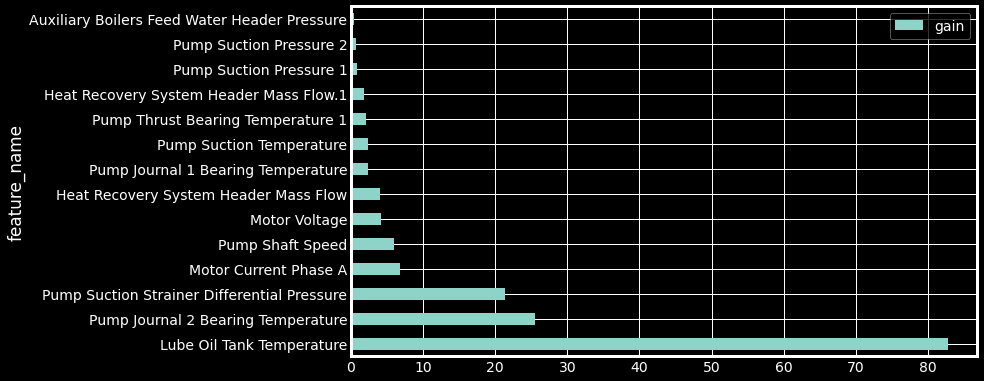

In [268]:
feature_score.plot(x='feature_name', y='gain', kind='barh', figsize=[10,6])
plt.show()

In [269]:
list(feature_score["feature_name"])[:10]
selected_cols = feature_score["feature_name"].values[:10]
selected_cols

array(['Lube Oil Tank Temperature', 'Pump Journal 2 Bearing Temperature',
       'Pump Suction Strainer Differential Pressure',
       'Motor Current Phase A', 'Pump Shaft Speed', 'Motor Voltage',
       'Heat Recovery System Header Mass Flow',
       'Pump Journal 1 Bearing Temperature', 'Pump Suction Temperature',
       'Pump Thrust Bearing Temperature 1'], dtype=object)

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_cols],y, train_size=0.6,test_size=0.4,random_state=42)

In [272]:
def baye_opt(max_depth, min_child_weight, n_estimators, learning_rate, colsample_bytree):
            params_opt = {}
            params_opt['max_depth'] = int(max_depth)
            params_opt['min_child_weight'] = int(min_child_weight)
            params_opt['colsample_bytree'] = colsample_bytree
            params_opt['learning_rate'] = learning_rate
            params_opt['n_estimators'] = int(n_estimators)

            scores = cross_val_score(xgb.XGBRegressor(objective='reg:squarederror', 
                                                        tree_method='hist', 
                                                        **params_opt), 
                                                        X_train, y_train, 
                                                        scoring='neg_mean_absolute_error', 
                                                        cv=5).mean()
            return float(scores.mean())


In [273]:
# params = {'max_depth': (5, 11), 'min_child_weight':(4, 10), 'n_estimators': (70, 130), 'eta':(0.05, 0,12), 'colsample_bytree': (0.3, 0.9)}
params ={'max_depth':(8, 11),
            'min_child_weight': (3, 9),
            'colsample_bytree':(0.6, 1),
            'learning_rate':(0.05, 0.13),
            'n_estimators':(100, 120)
}
xgb_bo = BayesianOptimization(baye_opt, params)
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=7, n_iter=20, acq='ei')

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------
|  1        | -0.1274   |  0.6928   |  0.1085   |  9.84     |  8.984    |  100.4    |
|  2        | -0.1302   |  0.9492   |  0.09442  |  8.826    |  3.379    |  105.4    |
|  3        | -0.1257   |  0.642    |  0.08786  |  10.97    |  3.096    |  108.5    |
|  4        | -0.124    |  0.9864   |  0.09709  |  10.88    |  4.373    |  110.1    |
|  5        | -0.1283   |  0.8014   |  0.07431  |  9.978    |  5.993    |  115.1    |
|  6        | -0.1298   |  0.7258   |  0.1061   |  8.31     |  7.428    |  101.4    |
|  7        | -0.1259   |  0.6438   |  0.08468  |  10.3     |  7.32     |  104.5    |
|  8        | -0.1247   |  0.6542   |  0.1005   |  11.0     |  3.658    |  109.8    |
|  9        | -0.1255   |  0.6      |  0.05982  |  11.0     |  5.501    |  109.6    |
|  10       | -0.1224   |  1.0      |  0.13     |  10.

In [274]:
xgb_bo.max['params']

{'colsample_bytree': 0.997515786463604,
 'learning_rate': 0.12536873641687993,
 'max_depth': 10.356185355317354,
 'min_child_weight': 6.535744063493688,
 'n_estimators': 117.72505595292115}

In [275]:

regressor=xgboost.XGBRegressor(
             early_stopping_rounds=10,
             learning_rate=xgb_bo.max['params']['learning_rate'], 
             max_depth=int(xgb_bo.max['params']['max_depth']), 
             min_child_weight=int(xgb_bo.max['params']['min_child_weight']),
             n_estimators=int(xgb_bo.max['params']['n_estimators']),
             colsample_bytree=xgb_bo.max['params']['colsample_bytree'],
             n_jobs=-1,
             tree_method='hist', 
             objective='reg:squarederror'
             )
eval_set = [(X_test, y_test)]
regressor.fit(X_train,y_train, eval_set=eval_set)

[0]	validation_0-rmse:6.43773
[1]	validation_0-rmse:5.63146
[2]	validation_0-rmse:4.92636
[3]	validation_0-rmse:4.30978
[4]	validation_0-rmse:3.77059
[5]	validation_0-rmse:3.29914
[6]	validation_0-rmse:2.88694
[7]	validation_0-rmse:2.52659
[8]	validation_0-rmse:2.21159
[9]	validation_0-rmse:1.93634
[10]	validation_0-rmse:1.69584
[11]	validation_0-rmse:1.48577
[12]	validation_0-rmse:1.30238
[13]	validation_0-rmse:1.14236
[14]	validation_0-rmse:1.00284
[15]	validation_0-rmse:0.88121
[16]	validation_0-rmse:0.77537
[17]	validation_0-rmse:0.68342
[18]	validation_0-rmse:0.60358
[19]	validation_0-rmse:0.53445
[20]	validation_0-rmse:0.47477
[21]	validation_0-rmse:0.42347
[22]	validation_0-rmse:0.37944
[23]	validation_0-rmse:0.34208
[24]	validation_0-rmse:0.31010
[25]	validation_0-rmse:0.28332
[26]	validation_0-rmse:0.26097
[27]	validation_0-rmse:0.24216
[28]	validation_0-rmse:0.22682
[29]	validation_0-rmse:0.21419
[30]	validation_0-rmse:0.20403
[31]	validation_0-rmse:0.19550
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.997515786463604, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.12536873641687993,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=10,
             max_leaves=0, min_child_weight=6, missing=nan,
             monotone_constraints='()', n_estimators=117, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [276]:
y_pred = regressor.predict(X_train)
regression_results(y_train.values, y_pred)

explained_variance:  0.756
mean_squared_log_error:  0.0003
r2:  0.756
MAE:  0.1158
MSE:  0.022
RMSE:  0.1483


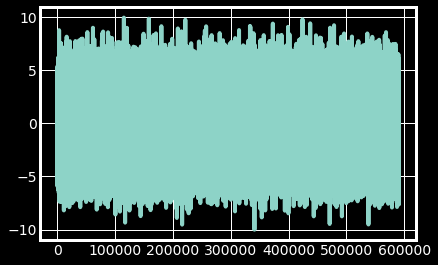

In [277]:
perc_error_train = (y_train.values - y_pred)/y_train.values*100
plt.plot(perc_error_train)
plt.show()

In [278]:
# Testing performance on test dataset
y_test_pred = regressor.predict(X_test)
regression_results(y_test.values, y_test_pred)

explained_variance:  0.7298
mean_squared_log_error:  0.0003
r2:  0.7298
MAE:  0.1219
MSE:  0.0244
RMSE:  0.1563


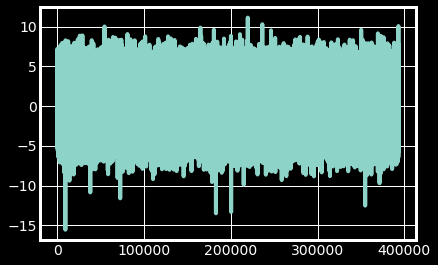

In [279]:
perc_error_test = (y_test.values - y_test_pred)/y_test.values*100
plt.plot(perc_error_test)
plt.show()